#Project
### Logistic Regression
name: Avipreet singh

In [ ]:
# import the essential libraries
# read the data from a csv file and put them into a dataframe

import pandas as pd
import numpy as np
# data contains deaths by drug ovedose and population
df_deaths = pd.read_csv('/content/deaths-drug-overdoses-who.csv')
df_population = pd.read_csv('/content/gdp-vs-happiness.csv')

# research question 1(demographic disparity)
df_age = pd.read_csv('/content/median-age.csv')
df_hdi = pd.read_csv('/content/human-development-index (1).csv')
df_income = pd.read_csv('/content/gross-national-income-per-capita.csv')
df_urban = pd.read_csv('/content/share-of-population-urban.csv')
df_anxiety = pd.read_csv('/content/anxiety-disorders-prevalence.csv')
df_employment = pd.read_csv('/content/industry-share-of-total-emplyoment.csv')
df_youngfree = pd.read_csv('/content/youth-not-in-education-employment-training.csv')
df_corruption = pd.read_csv('/content/political-corruption-index.csv')
df_demo = pd.read_csv('/content/electoral-democracy-index.csv')

In [ ]:
df_deaths.head()

,Entity,Code,Year,Deaths - Cause: Opioid use disorders - Sex: Both sexes - Age_group: ALLAges,Deaths - Cause: Cocaine use disorders - Sex: Both sexes - Age_group: ALLAges,Deaths - Cause: Other drug use disorders - Sex: Both sexes - Age_group: ALLAges,Deaths - Cause: Amphetamine use disorders - Sex: Both sexes - Age_group: ALLAges
0,Afghanistan,AFG,2000,76.83,4.86,46.10,5.49
1,Afghanistan,AFG,2001,83.66,5.34,49.25,5.96
2,Afghanistan,AFG,2002,92.46,5.98,53.92,6.61
3,Afghanistan,AFG,2003,99.93,6.66,59.44,7.33
4,Afghanistan,AFG,2004,110.66,7.35,64.98,8.04


In [ ]:
# lets sum up all deaths

df_deaths['Total-deaths'] = df_deaths['Deaths - Cause: Opioid use disorders - Sex: Both sexes - Age_group: ALLAges']+df_deaths['Deaths - Cause: Cocaine use disorders - Sex: Both sexes - Age_group: ALLAges']+df_deaths['Deaths - Cause: Other drug use disorders - Sex: Both sexes - Age_group: ALLAges']+df_deaths['Deaths - Cause: Amphetamine use disorders - Sex: Both sexes - Age_group: ALLAges']

In [ ]:
# List of DataFrames to merge
df_multi =pd.merge(df_deaths, df_population, on=["Entity", "Year"])
df_multi =pd.merge(df_multi, df_hdi, on=["Entity", "Year"])
df_multi =pd.merge(df_multi ,df_age, on=["Entity", "Year"])
df_multi = pd.merge(df_multi, df_urban, on=["Entity", "Year"])
df_multi = pd.merge(df_multi, df_anxiety, on=["Entity", "Year"])
df_multi = pd.merge(df_multi, df_corruption, on=["Entity", "Year"])
df_multi = pd.merge(df_multi, df_employment, on=["Entity", "Year"])
df_multi = pd.merge(df_multi, df_youngfree, on=["Entity", "Year"])
df_multi = pd.merge(df_multi, df_demo, on=["Entity", "Year"])

<ipython-input-899-e47940443d83>:4: FutureWarning: Passing 'suffixes' which cause duplicate columns {'Code_x'} in the result is deprecated and will raise a MergeError in a future version.
  df_multi =pd.merge(df_multi ,df_age, on=["Entity", "Year"])
<ipython-input-899-e47940443d83>:6: FutureWarning: Passing 'suffixes' which cause duplicate columns {'Code_x'} in the result is deprecated and will raise a MergeError in a future version.
  df_multi = pd.merge(df_multi, df_anxiety, on=["Entity", "Year"])
<ipython-input-899-e47940443d83>:8: FutureWarning: Passing 'suffixes' which cause duplicate columns {'Code_x'} in the result is deprecated and will raise a MergeError in a future version.
  df_multi = pd.merge(df_multi, df_employment, on=["Entity", "Year"])
<ipython-input-899-e47940443d83>:10: FutureWarning: Passing 'suffixes' which cause duplicate columns {'Code_x'} in the result is deprecated and will raise a MergeError in a future version.
  df_multi = pd.merge(df_multi, df_demo, on=["En

In [ ]:
df_multi.columns

Index(['Entity', 'Code_x', 'Year',
       'Deaths - Cause: Opioid use disorders - Sex: Both sexes - Age_group: ALLAges',
       'Deaths - Cause: Cocaine use disorders - Sex: Both sexes - Age_group: ALLAges',
       'Deaths - Cause: Other drug use disorders - Sex: Both sexes - Age_group: ALLAges',
       'Deaths - Cause: Amphetamine use disorders - Sex: Both sexes - Age_group: ALLAges',
       'Total-deaths', 'Code_y', 'Cantril ladder score',
       'GDP per capita, PPP (constant 2017 international $)',
       'Population (historical estimates)', 'Continent', 'Code_x',
       'Human Development Index', 'Code_y',
       'Median age - Sex: all - Age: all - Variant: estimates',
       'Median age - Sex: all - Age: all - Variant: medium', 'Code_x',
       'Urban population (% of total population)', 'Code_y',
       'Anxiety disorders (share of population) - Sex: Both - Age: Age-standardized',
       'Code_x', 'corruption_vdem_owid', 'corruption_vdem_high_owid',
       'corruption_vdem_low_o

In [ ]:
df_multi = df_multi.drop([  'Code_x',
       'Deaths - Cause: Opioid use disorders - Sex: Both sexes - Age_group: ALLAges',
       'Deaths - Cause: Cocaine use disorders - Sex: Both sexes - Age_group: ALLAges',
       'Deaths - Cause: Other drug use disorders - Sex: Both sexes - Age_group: ALLAges',
       'Deaths - Cause: Amphetamine use disorders - Sex: Both sexes - Age_group: ALLAges',
       'Code_y','Continent', 'Code_x', 'Code_y',
       'Median age - Sex: all - Age: all - Variant: medium', 'Code_x', 'Code_y',
       'Code_x', 'corruption_vdem_high_owid',
       'corruption_vdem_low_owid', 'Code_y',
       'Code_x',
       'Code_y', 'electdem_vdem_high_owid',
       'electdem_vdem_low_owid'], axis = 1)

In [ ]:
df_multi.columns

Index(['Entity', 'Year', 'Total-deaths', 'Cantril ladder score',
       'GDP per capita, PPP (constant 2017 international $)',
       'Population (historical estimates)', 'Human Development Index',
       'Median age - Sex: all - Age: all - Variant: estimates',
       'Urban population (% of total population)',
       'Anxiety disorders (share of population) - Sex: Both - Age: Age-standardized',
       'corruption_vdem_owid',
       'Industry as % of total employment -- ILO modelled estimates, May 2017',
       'Share of youth not in education, employment or training, total (% of youth population)',
       'Electoral democracy index'],
      dtype='object')

In [ ]:
#adding new column
df_multi['deaths_by_population'] = (df_multi['Total-deaths']/df_multi['Population (historical estimates)'])

In [ ]:
df_multi

,Entity,Year,Total-deaths,Cantril ladder score,"GDP per capita, PPP (constant 2017 international $)",Population (historical estimates),Human Development Index,Median age - Sex: all - Age: all - Variant: estimates,Urban population (% of total population),Anxiety disorders (share of population) - Sex: Both - Age: Age-standardized,corruption_vdem_owid,"Industry as % of total employment -- ILO modelled estimates, May 2017","Share of youth not in education, employment or training, total (% of youth population)",Electoral democracy index,deaths_by_population
0,Afghanistan,2014,271.42,4.220169,2102.384521,32716214.0,0.479,15.5,24.587,4.793179,0.918,9.699,35.06,0.377,0.000008
1,Afghanistan,2017,302.01,2.375092,2058.400146,35643420.0,0.482,16.0,25.250,4.816584,0.886,9.958,42.84,0.354,0.000008
2,Albania,2002,26.86,NaN,6753.890625,3123554.0,0.689,27.3,43.501,3.713175,0.745,16.020,41.80,0.477,0.000009
3,Albania,2005,24.52,4.634252,8040.092773,3032636.0,0.711,29.1,46.731,3.719762,0.727,17.768,35.19,0.505,0.000008
4,Albania,2007,28.09,5.485470,9150.129883,2976089.0,0.730,30.4,48.902,3.730676,0.727,18.410,33.77,0.540,0.000009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1243,Yemen,2014,499.34,3.825631,NaN,27753310.0,0.505,17.4,34.165,4.781608,0.878,19.120,44.77,0.317,0.000018
1244,Zambia,2008,80.45,NaN,2747.438477,12852968.0,0.506,15.3,38.371,3.814764,0.360,7.528,12.94,0.528,0.000006
1245,Zambia,2017,113.17,3.306797,3485.021729,17298056.0,0.568,16.3,42.976,3.984899,0.362,9.920,42.83,0.344,0.000007
1246,Zimbabwe,2011,174.43,4.690188,3203.870605,13025789.0,0.535,17.0,33.015,3.183598,0.792,9.080,17.26,0.262,0.000013


In [ ]:
df_multi = df_multi[df_multi['Year'] == 2017 ]

In [ ]:
df_multi['analysis'] = df_multi['deaths_by_population'] > 0.001/100

<ipython-input-906-2b365614a3b8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_multi['analysis'] = df_multi['deaths_by_population'] > 0.001/100


In [ ]:
df_multi

,Entity,Year,Total-deaths,Cantril ladder score,"GDP per capita, PPP (constant 2017 international $)",Population (historical estimates),Human Development Index,Median age - Sex: all - Age: all - Variant: estimates,Urban population (% of total population),Anxiety disorders (share of population) - Sex: Both - Age: Age-standardized,corruption_vdem_owid,"Industry as % of total employment -- ILO modelled estimates, May 2017","Share of youth not in education, employment or training, total (% of youth population)",Electoral democracy index,deaths_by_population,analysis
1,Afghanistan,2017,302.01,2.375092,2058.400146,35643420.0,0.482,16.0,25.250,4.816584,0.886,9.958,42.84,0.354,0.000008,False
14,Albania,2017,24.93,4.995318,12770.963867,2879361.0,0.802,35.6,59.383,3.811360,0.780,18.318,26.23,0.520,0.000009,False
22,Algeria,2017,927.53,4.744627,11737.401367,41136548.0,0.744,27.0,72.052,4.737448,0.666,34.508,20.95,0.308,0.000023,True
37,Argentina,2017,795.00,6.085561,23597.117188,44054616.0,0.851,30.3,91.749,4.974968,0.429,24.845,19.25,0.746,0.000018,True
45,Armenia,2017,33.83,5.488087,12115.139648,2851929.0,0.768,32.9,63.103,3.147962,0.817,15.737,36.59,0.387,0.000012,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1201,United States,2017,68504.17,6.943701,60109.656250,329791232.0,0.924,36.9,82.058,5.175325,0.103,17.232,10.97,0.820,0.000208,True
1219,Uruguay,2017,39.76,6.600337,23009.875000,3422205.0,0.819,34.3,95.240,5.137667,0.053,20.497,17.87,0.885,0.000012,True
1232,Venezuela,2017,214.32,5.080803,NaN,30563430.0,0.744,26.8,88.183,3.988130,0.854,26.823,22.85,0.235,0.000007,False
1242,Vietnam,2017,1279.31,5.467451,7155.443359,94033048.0,0.692,30.5,35.213,2.277422,0.468,22.937,11.12,0.153,0.000014,True


In [ ]:
# replace all the TRUE by 1
df_multi = df_multi.replace(True,1)

In [ ]:
# repalce all the Bs with 0
df_multi = df_multi.replace(False,0)

In [ ]:
df_multi

,Entity,Year,Total-deaths,Cantril ladder score,"GDP per capita, PPP (constant 2017 international $)",Population (historical estimates),Human Development Index,Median age - Sex: all - Age: all - Variant: estimates,Urban population (% of total population),Anxiety disorders (share of population) - Sex: Both - Age: Age-standardized,corruption_vdem_owid,"Industry as % of total employment -- ILO modelled estimates, May 2017","Share of youth not in education, employment or training, total (% of youth population)",Electoral democracy index,deaths_by_population,analysis
1,Afghanistan,2017,302.01,2.375092,2058.400146,35643420.0,0.482,16.0,25.250,4.816584,0.886,9.958,42.84,0.354,0.000008,0
14,Albania,2017,24.93,4.995318,12770.963867,2879361.0,0.802,35.6,59.383,3.811360,0.780,18.318,26.23,0.520,0.000009,0
22,Algeria,2017,927.53,4.744627,11737.401367,41136548.0,0.744,27.0,72.052,4.737448,0.666,34.508,20.95,0.308,0.000023,1
37,Argentina,2017,795.00,6.085561,23597.117188,44054616.0,0.851,30.3,91.749,4.974968,0.429,24.845,19.25,0.746,0.000018,1
45,Armenia,2017,33.83,5.488087,12115.139648,2851929.0,0.768,32.9,63.103,3.147962,0.817,15.737,36.59,0.387,0.000012,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1201,United States,2017,68504.17,6.943701,60109.656250,329791232.0,0.924,36.9,82.058,5.175325,0.103,17.232,10.97,0.820,0.000208,1
1219,Uruguay,2017,39.76,6.600337,23009.875000,3422205.0,0.819,34.3,95.240,5.137667,0.053,20.497,17.87,0.885,0.000012,1
1232,Venezuela,2017,214.32,5.080803,NaN,30563430.0,0.744,26.8,88.183,3.988130,0.854,26.823,22.85,0.235,0.000007,0
1242,Vietnam,2017,1279.31,5.467451,7155.443359,94033048.0,0.692,30.5,35.213,2.277422,0.468,22.937,11.12,0.153,0.000014,1


In [ ]:
# randomly get a sample of n rows from the dataframe
df_multi=df_multi.sample(n=100,replace=False)

In [ ]:
# check if there is any null value (NaN) in the dataframe
# output of True means existence of null values
# output of False means no null values in the dataframe
df_multi.isnull().any().any()

True

In [ ]:
# check if there is any null value (NaN) in each column
# output of True means existence of null values in that column
# output of False means no null values in that column
df_multi.isnull().any()

Entity                                                                                    False
Year                                                                                      False
Total-deaths                                                                              False
Cantril ladder score                                                                       True
GDP per capita, PPP (constant 2017 international $)                                        True
Population (historical estimates)                                                         False
Human Development Index                                                                   False
Median age - Sex: all - Age: all - Variant: estimates                                     False
Urban population (% of total population)                                                  False
Anxiety disorders (share of population) - Sex: Both - Age: Age-standardized               False
corruption_vdem_owid                    

In [ ]:
# replace the null values (NaN) with the average/mean value of that column
df_multi =df_multi.fillna(df_multi.mean())

<ipython-input-914-35ac86c935b4>:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_multi =df_multi.fillna(df_multi.mean())


In [ ]:
# list the names/labels of the columns/variables
df_multi.columns

Index(['Entity', 'Year', 'Total-deaths', 'Cantril ladder score',
       'GDP per capita, PPP (constant 2017 international $)',
       'Population (historical estimates)', 'Human Development Index',
       'Median age - Sex: all - Age: all - Variant: estimates',
       'Urban population (% of total population)',
       'Anxiety disorders (share of population) - Sex: Both - Age: Age-standardized',
       'corruption_vdem_owid',
       'Industry as % of total employment -- ILO modelled estimates, May 2017',
       'Share of youth not in education, employment or training, total (% of youth population)',
       'Electoral democracy index', 'deaths_by_population', 'analysis'],
      dtype='object')

In [ ]:
# identify 30 columns as the X variable (30 predictors)
# print the first 5 rows of X

X = np.asarray(df_multi[['Cantril ladder score',
       'GDP per capita, PPP (constant 2017 international $)',
       'Population (historical estimates)', 'Human Development Index',
       'Median age - Sex: all - Age: all - Variant: estimates',
       'Urban population (% of total population)',
       'Anxiety disorders (share of population) - Sex: Both - Age: Age-standardized',
       'corruption_vdem_owid',
       'Industry as % of total employment -- ILO modelled estimates, May 2017',
       'Share of youth not in education, employment or training, total (% of youth population)',]])
X[0:5]

array([[5.19685600e+00, 7.25781201e+03, 6.99792500e+06, 6.07000000e-01,
        2.26000000e+01, 3.43680000e+01, 4.52295640e+00, 7.67000000e-01,
        3.96200000e+00, 2.58000000e+01],
       [3.26815220e+00, 1.97524866e+03, 1.22303430e+07, 5.26000000e-01,
        1.84000000e+01, 1.71250000e+01, 3.67084480e+00, 3.52000000e-01,
        7.19100000e+00, 2.55900000e+01],
       [5.68522070e+00, 5.04669141e+03, 6.12126600e+06, 6.96000000e-01,
        2.34000000e+01, 3.61350000e+01, 2.05575780e+00, 8.27000000e-01,
        2.09920000e+01, 1.81900000e+01],
       [4.21329930e+00, 1.25841045e+04, 2.15068160e+07, 7.71000000e-01,
        3.14000000e+01, 1.83840000e+01, 4.01584050e+00, 4.64000000e-01,
        2.59410000e+01, 2.47200000e+01],
       [5.62574400e+00, 2.71540840e+04, 4.19246800e+06, 8.52000000e-01,
        4.27000000e+01, 5.66670000e+01, 3.58012650e+00, 3.56000000e-01,
        2.68090000e+01, 1.53500000e+01]])

In [ ]:
# identify the second column as the y variable (to be predicted/classified)
# print the first 5 rows of y

y = np.asarray(df_multi['analysis'])
y [0:5]

array([0, 0, 1, 1, 1])

In [ ]:
# convert the X variable into the standard format

from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[-0.62465312, -0.79185186, -0.46438667, -1.09324047, -0.99345048,
        -1.34505177,  0.15992963,  1.09797391, -2.3122433 ,  0.63898304],
       [-2.52470837, -1.04128078, -0.36367923, -1.6512271 , -1.4593904 ,
        -2.14437405, -0.50829324, -0.26468398, -1.85457542,  0.61955741],
       [-0.14354248, -0.89625523, -0.48125957, -0.48014405, -0.90470001,
        -1.26314012, -1.77483869,  1.29498469,  0.1015331 , -0.06496486],
       [-1.59360028, -0.54035816, -0.18513657,  0.03651024, -0.0171954 ,
        -2.08601142, -0.23774884,  0.10306947,  0.80298815,  0.53907979],
       [-0.20213573,  0.14759844, -0.51838281,  0.59449687,  1.23640486,
        -0.31135186, -0.57943421, -0.25154993,  0.92601562, -0.32767341]])

In [ ]:
# split the data into training and testing datasets

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=1)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (80, 10) (80,)
Test set: (20, 10) (20,)


In [ ]:
# build the logistic regression model using the training dataset

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
LR

LogisticRegression(C=0.01, solver='liblinear')

In [ ]:
# predict the region using the X values for testing dataset

yhat = LR.predict(X_test)
yhat

array([1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0])

In [ ]:
# calculate the corresponding probabilities that the prediction is 0 or 1 (respectively) for each case

yhat_prob = LR.predict_proba(X_test)
yhat_prob

array([[0.38309968, 0.61690032],
       [0.50093108, 0.49906892],
       [0.35330125, 0.64669875],
       [0.48841195, 0.51158805],
       [0.35920537, 0.64079463],
       [0.39942006, 0.60057994],
       [0.33459959, 0.66540041],
       [0.4757095 , 0.5242905 ],
       [0.4746494 , 0.5253506 ],
       [0.46276418, 0.53723582],
       [0.45165671, 0.54834329],
       [0.35012391, 0.64987609],
       [0.42356951, 0.57643049],
       [0.60247077, 0.39752923],
       [0.51826556, 0.48173444],
       [0.39986609, 0.60013391],
       [0.61790791, 0.38209209],
       [0.48820107, 0.51179893],
       [0.35169203, 0.64830797],
       [0.53510884, 0.46489116]])

In [ ]:
# calculate the accuracy of the classification/prediction for the testing dataset

from sklearn import metrics
print(metrics.accuracy_score(y_test, yhat))

0.75


In [ ]:
# create the confusion matrix

from sklearn.metrics import confusion_matrix, classification_report
cm=confusion_matrix(y_test, yhat)
print(cm)


[[ 4  4]
 [ 1 11]]


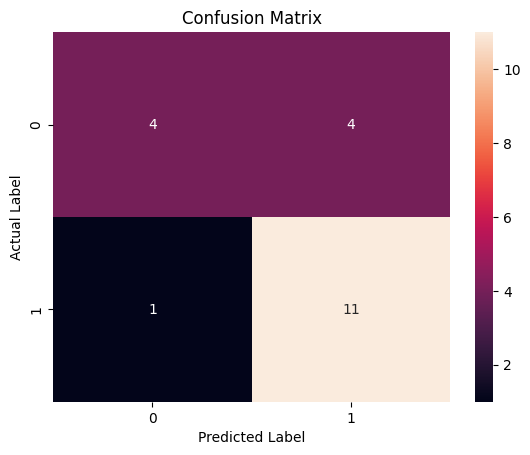

In [ ]:
# plot the confusion matrix to describe the performance of the classifier

import seaborn as sns
import matplotlib.pyplot as plt

class_label = ["0", "1"]
df_cm = pd.DataFrame(cm, index = class_label, columns = class_label)
sns.heatmap(df_cm, annot = True, fmt = "d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()